# Overview

**`GOAL`**

---

This project aims to analyze and compare ride-hailing services, focusing on Uber and Lyft in Boston to understand pricing dynamics, availability, and demand patterns. This project also completed by predictive model to estimate ride prices based on multiple influencing factors.

**`Contents`**

---

1. Availability and Demand Analysis: Identify which services are more used and available in different locations


2. Temporal Analysis: Identify the busiest hours for ride requests, and analyze how ride prices fluctuate during rush hours and off-peak periods

3. Price and Demand Analysis: Identify price distribution, and compare average ride prices between Uber and Lyft to identify cost differences based on destination, hours, cab, and service types

4. Weather and Price Correlation: Analyze the correlation between weather factors and price

5. Price Prediction Model: Build a regression model to predict ride prices based on several factors

**`Datasets`**

---

Datasets source: https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma?resource=download

# Import Libraries

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [ ]:
# get data from drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data

df=pd.read_csv('/content/drive/MyDrive/Data Project/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data Informations

In [ ]:
# information from data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# Data Pre-Processing

In [ ]:
# null values check

df.isnull().sum()

,0
id,0
timestamp,0
hour,0
day,0
month,0
datetime,0
timezone,0
source,0
destination,0
cab_type,0


In [ ]:
# drop null values

df.dropna(inplace=True)

In [ ]:
# null values check
df.isnull().sum()

,0
id,0
timestamp,0
hour,0
day,0
month,0
datetime,0
timezone,0
source,0
destination,0
cab_type,0


In [ ]:
# duplicated data check

df.duplicated().sum()

0

In [ ]:
# drop unused column

df.drop(['id','timestamp','timezone','product_id','long_summary', 'apparentTemperature', 'ozone',
         'latitude','longitude','visibility.1','sunriseTime', 'apparentTemperatureHigh',
         'sunsetTime','moonPhase','uvIndexTime', 'temperatureHighTime', 'apparentTemperatureLow',
         'temperatureLowTime', 'apparentTemperatureHighTime', 'windGustTime', 'apparentTemperatureMin',
         'apparentTemperatureLowTime','precipIntensityMax', 'temperatureMaxTime', 'apparentTemperatureMax',
         'temperatureMinTime','apparentTemperatureMinTime','apparentTemperatureMaxTime'], axis=1, inplace=True)

In [ ]:
# label encode

label = LabelEncoder()

categorical_columns = ['source','destination','icon', 'short_summary']

for col in categorical_columns:
    df[col + '_encoded'] = label.fit_transform(df[col])

df.head()


,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,pressure,windBearing,cloudCover,uvIndex,temperatureMin,temperatureMax,source_encoded,destination_encoded,icon_encoded,short_summary_encoded
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,1021.98,57,0.72,0,39.89,43.68,5,7,5,4
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,1003.97,90,1.00,0,40.49,47.30,5,7,6,8
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,992.28,240,0.03,0,35.36,47.55,5,7,1,0
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,1013.73,310,0.00,0,34.67,45.03,5,7,1,0
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,998.36,303,0.44,0,33.10,42.18,5,7,5,6


In [ ]:
# label encode for 'name' and 'cab_type' columns

dummies_columns = ['name', 'cab_type']

df_onehot = pd.get_dummies(df, columns=dummies_columns, prefix=dummies_columns) # one-hot encode
df_onehot = df_onehot.replace({True:1,False:0})
df_onehot.head()

,hour,day,month,datetime,source,destination,price,distance,surge_multiplier,temperature,...,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,5.0,0.44,1.0,42.34,...,0,0,0,1,0,0,0,0,1,0
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,11.0,0.44,1.0,43.58,...,0,0,0,0,0,0,0,0,1,0
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,7.0,0.44,1.0,38.33,...,0,1,0,0,0,0,0,0,1,0
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,26.0,0.44,1.0,34.38,...,1,0,0,0,0,0,0,0,1,0
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,9.0,0.44,1.0,37.44,...,0,0,1,0,0,0,0,0,1,0


# Availability and Demand Analysis

## Uber and Lyft User Comparison

cab_type
Uber    330568
Lyft    307408
Name: count, dtype: int64


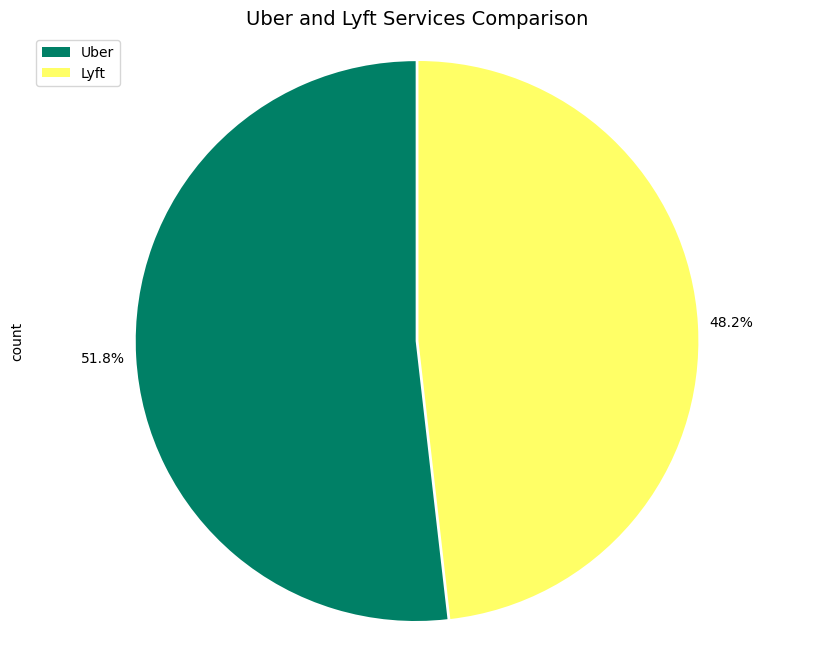

In [ ]:
# uber and lyft user value counts

print(df['cab_type'].value_counts())

# visualization

df['cab_type'].value_counts().plot(kind='pie', figsize=(10,8),
                                   autopct='%1.1f%%', pctdistance=1.12, explode=[0.005,0.005],
                                   startangle=90, labels=None, colormap='summer')

plt.legend(labels=['Uber','Lyft'], loc='upper left')
plt.axis('equal')
plt.title('Uber and Lyft Services Comparison', fontsize=14)
plt.show()

**INSIGHTS**

---



From the pie chart, it can be seen that Uber users are more than Lyft users with a difference  of 23 thousand users.

## Uber and Lyft User Comparison Sort by Service Types

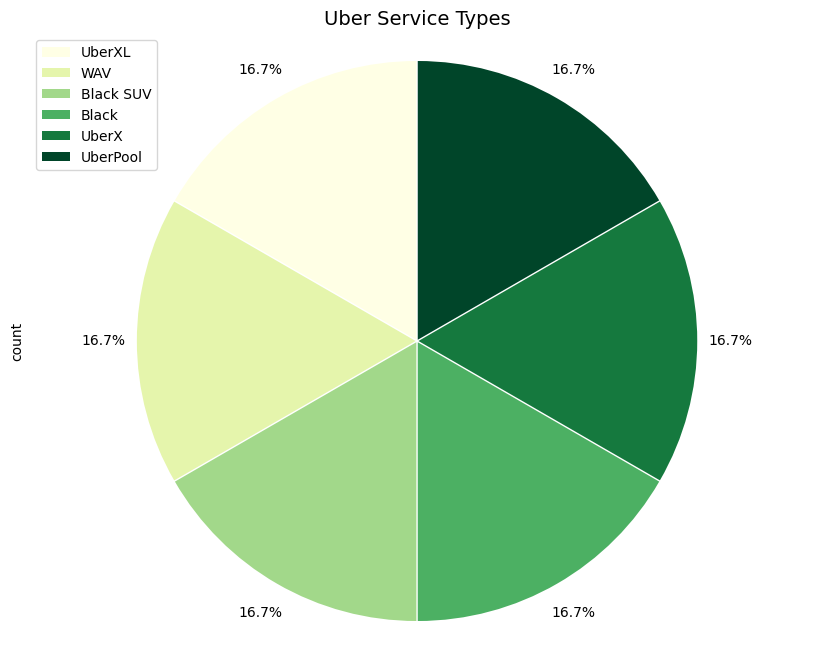

In [ ]:
# uber services types visualization

df_uber = df[df['cab_type']=='Uber']
uber_counts = df_uber['name'].value_counts()

explode_list=[0.005,0.005,0.005,0.005,0.005,0.005]
uber_counts.plot(kind='pie', figsize=(10,8),
                 autopct='%1.1f%%', pctdistance=1.12,  explode=explode_list,
                 startangle=90, labels=None, colormap='YlGn')

plt.legend(labels=uber_counts.index, loc='upper left')
plt.axis('equal')
plt.title('Uber Service Types', fontsize=14)
plt.show()

**INSIGHTS**

---



Based on the different types of Uber services, all 6 services types show the same proportion of users.

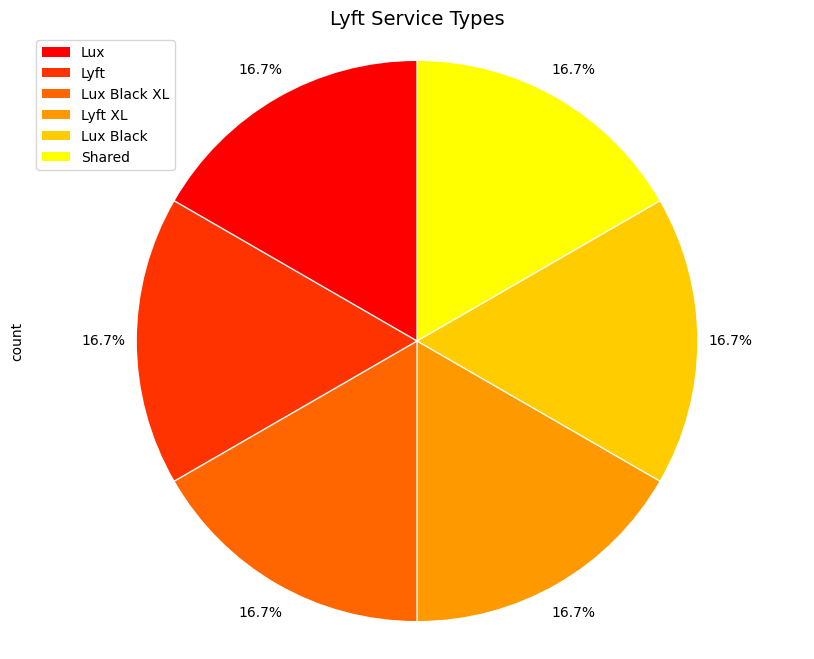

In [ ]:
# visualization

df_lyft = df[df['cab_type']=='Lyft']
lyft_counts = df_lyft['name'].value_counts()

explode_list=[0.005,0.005,0.005,0.005,0.005,0.005]
lyft_counts.plot(kind='pie', figsize=(10,8),
                 autopct='%1.1f%%', pctdistance=1.12, explode=explode_list,
                 startangle=90, labels=None, colormap='autumn')

plt.legend(labels=lyft_counts.index, loc='upper left')
plt.axis('equal')
plt.title('Lyft Service Types', fontsize=14)
plt.show()

**INSIGHTS**

---



Based on the different types of Lyft services, all 6 services types show the same proportion of users.

## Uber and Lyft Top 5 Pickup Locations

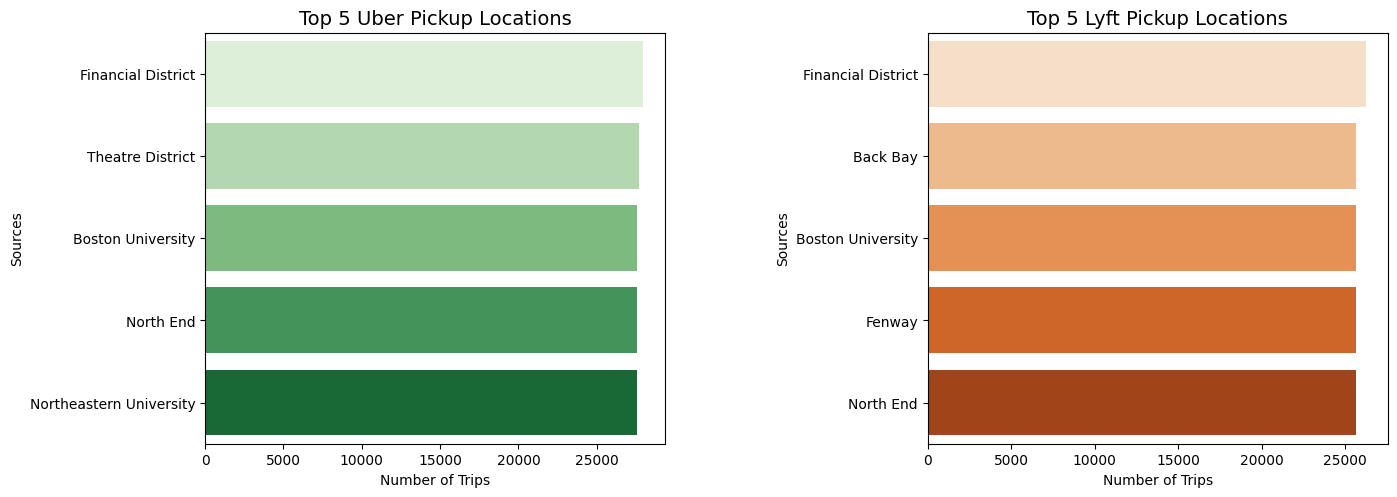

In [ ]:
# top pickup locations counts

sources_counts = df.groupby(['cab_type', 'source']).size().reset_index(name='count')

uber_top_sources = sources_counts[sources_counts['cab_type'] == 'Uber'].nlargest(5, 'count')
lyft_top_sources = sources_counts[sources_counts['cab_type'] == 'Lyft'].nlargest(5, 'count')

# visualization

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# uber bar chart

sns.barplot(data=uber_top_sources, x='count', y='source', palette='Greens', ax=axes[0])
axes[0].set_title('Top 5 Uber Pickup Locations', fontsize=14)
axes[0].set_xlabel('Number of Trips')
axes[0].set_ylabel('Sources')

# lyft bar chart

sns.barplot(data=lyft_top_sources, x='count', y='source', palette='Oranges', ax=axes[1])
axes[1].set_title('Top 5 Lyft Pickup Locations', fontsize=14)
axes[1].set_xlabel('Number of Trips')
axes[1].set_ylabel('Sources')

plt.tight_layout(pad=8)
plt.show()

**INSIGHTS**

---

There are differences in the top 5 pickup locations between Uber and Lyft. The top 5 pickup locations for Uber are Financial District, Theatre District, Boston University, North End, and Northeastern University. While for Lyft are Financial District, Back Bay, Boston University, Fenway, and North End.

Both Uber and Lyft have similarities in the first position of the pick-up location. Financial distric is the most pick-up location for both Uber and Lyft.


## Uber and Lyft Top 5 Destinations

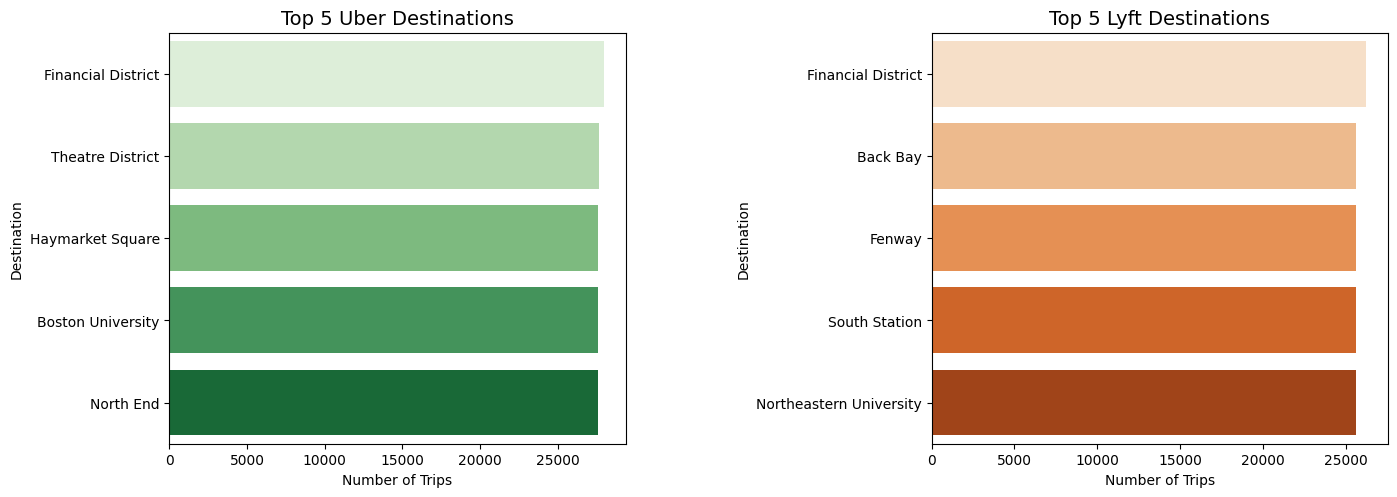

In [ ]:
# top destinations counts

destination_counts = df.groupby(['cab_type', 'destination']).size().reset_index(name='count')

uber_top = destination_counts[destination_counts['cab_type'] == 'Uber'].nlargest(5, 'count')
lyft_top = destination_counts[destination_counts['cab_type'] == 'Lyft'].nlargest(5, 'count')

# visualization

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# uber bar chart

sns.barplot(data=uber_top, x='count', y='destination', palette='Greens', ax=axes[0])
axes[0].set_title('Top 5 Uber Destinations', fontsize=14)
axes[0].set_xlabel('Number of Trips')
axes[0].set_ylabel('Destination')

# lyft bar chart

sns.barplot(data=lyft_top, x='count', y='destination', palette='Oranges', ax=axes[1])
axes[1].set_title('Top 5 Lyft Destinations', fontsize=14)
axes[1].set_xlabel('Number of Trips')
axes[1].set_ylabel('Destination')

plt.tight_layout(pad=8)
plt.show()

**INSIGHTS**

---

There are differences in the top 5 destinations between Uber and Lyft. The top 5 pickup locations for Uber are Financial District, Theatre District, Haymarket Square, Boston University, and North End. While for Lyft are Financial District, Back Bay, Fenway, South Station, and Northeastern University.

Both Uber and Lyft have similarities in the first position of the destination location. Financial District is the most destination location for both Uber and Lyft.


# Temporal Analysis

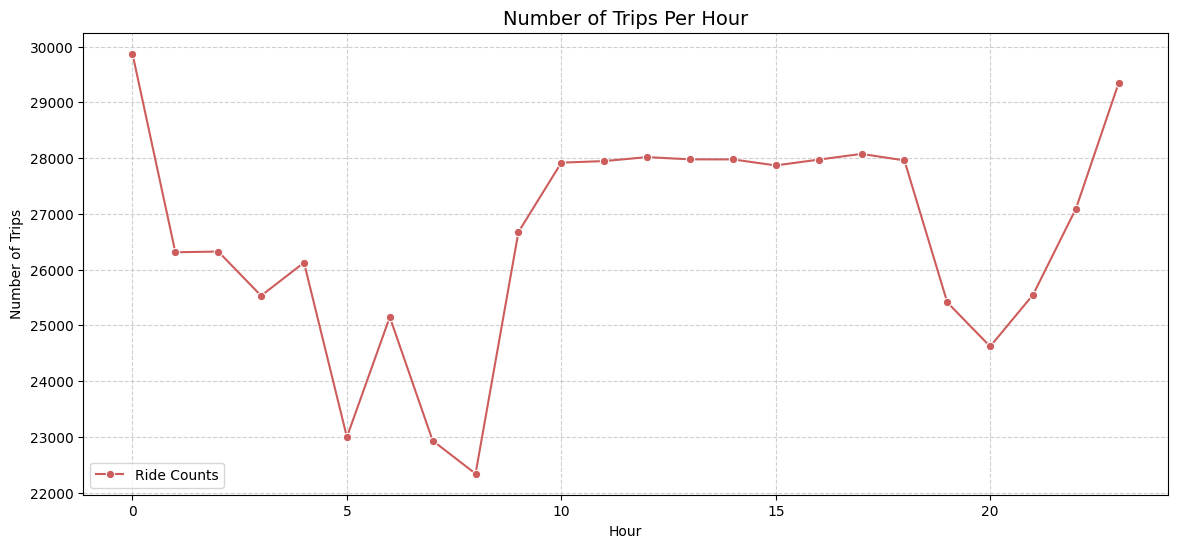

In [ ]:
# peak hours analysis

df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour

peak_hours = df.groupby('hour').size().reset_index(name='ride_count')

fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data=peak_hours, x='hour', y='ride_count', marker='o', color='indianred', label='Ride Counts', ax=ax)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_title('Number of Trips Per Hour', fontsize=14)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Trips')
ax.legend(loc='lower left')
plt.show()


**INSIGHTS**

---

Based on the hourly trip count chart line, the highest number of trips occurred at 0 AM where the number of trips reached close to 30 thousand trips.

The lowest number of trips occurs in the early morning hours around 4-8 AM.

Peak hours occur around 8 AM to 10 AM, and the total increase in trips reached more than 4.3 thousand trips.

At 10 AM to 6 PM, the number of trips tended to stagnate, at 6 PM to 8 PM there was a decrease in the number of trips by 3.3 thousand trips. The number of trips then gradually increased to 4.7 thousand trips at 11 PM.


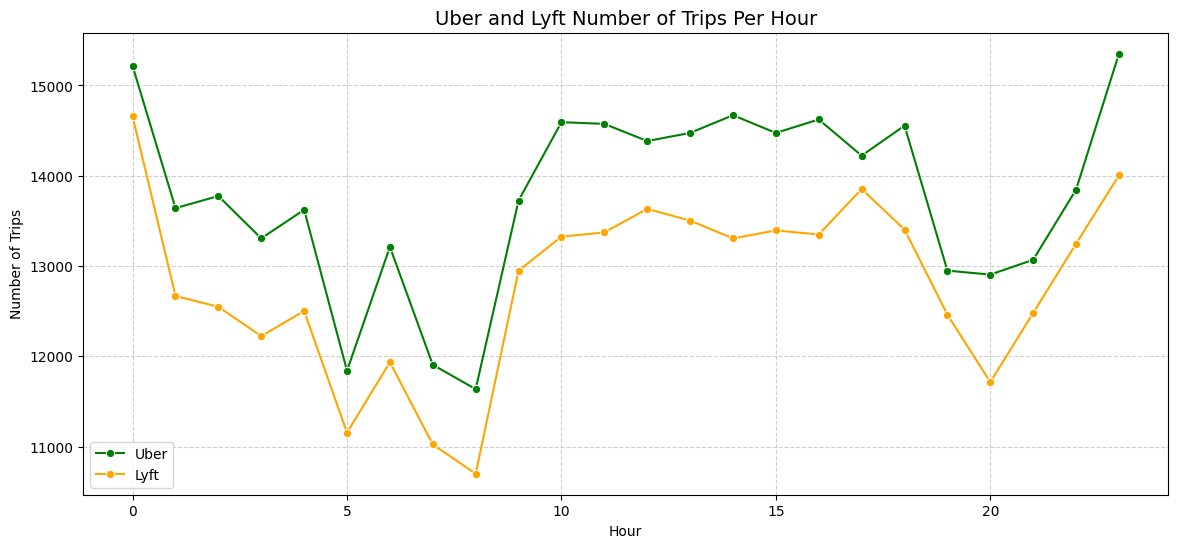

In [ ]:
# uber and lyft

df_uber = df[df['cab_type'] == 'Uber']
df_lyft = df[df['cab_type'] == 'Lyft']

peak_hours_uber = df_uber.groupby('hour').size().reset_index(name='ride_count')
peak_hours_lyft = df_lyft.groupby('hour').size().reset_index(name='ride_count')

fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data=peak_hours_uber, x='hour', y='ride_count', marker='o', color='green', label='Uber', ax=ax)
sns.lineplot(data=peak_hours_lyft, x='hour', y='ride_count', marker='o', color='orange', label='Lyft', ax=ax)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_title('Uber and Lyft Number of Trips Per Hour', fontsize=14)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Trips')
ax.legend(loc='lower left')
plt.show()

**INSIGHTS**

---

Both Uber and Lyft show a similar pattern in trip volume over the 24 hours. Uber has slightly more trips than Lyft throughout the day.

The highest number of trips occur at 11 PM and 0 AM. The lowest number of trips occur around 6-7 AM. Significant rise occurs after 8 AM. Both Uber and Lyft maintain a stable number of trips in the afternoon.

# Price and Demand Analysis

## Price Distribution

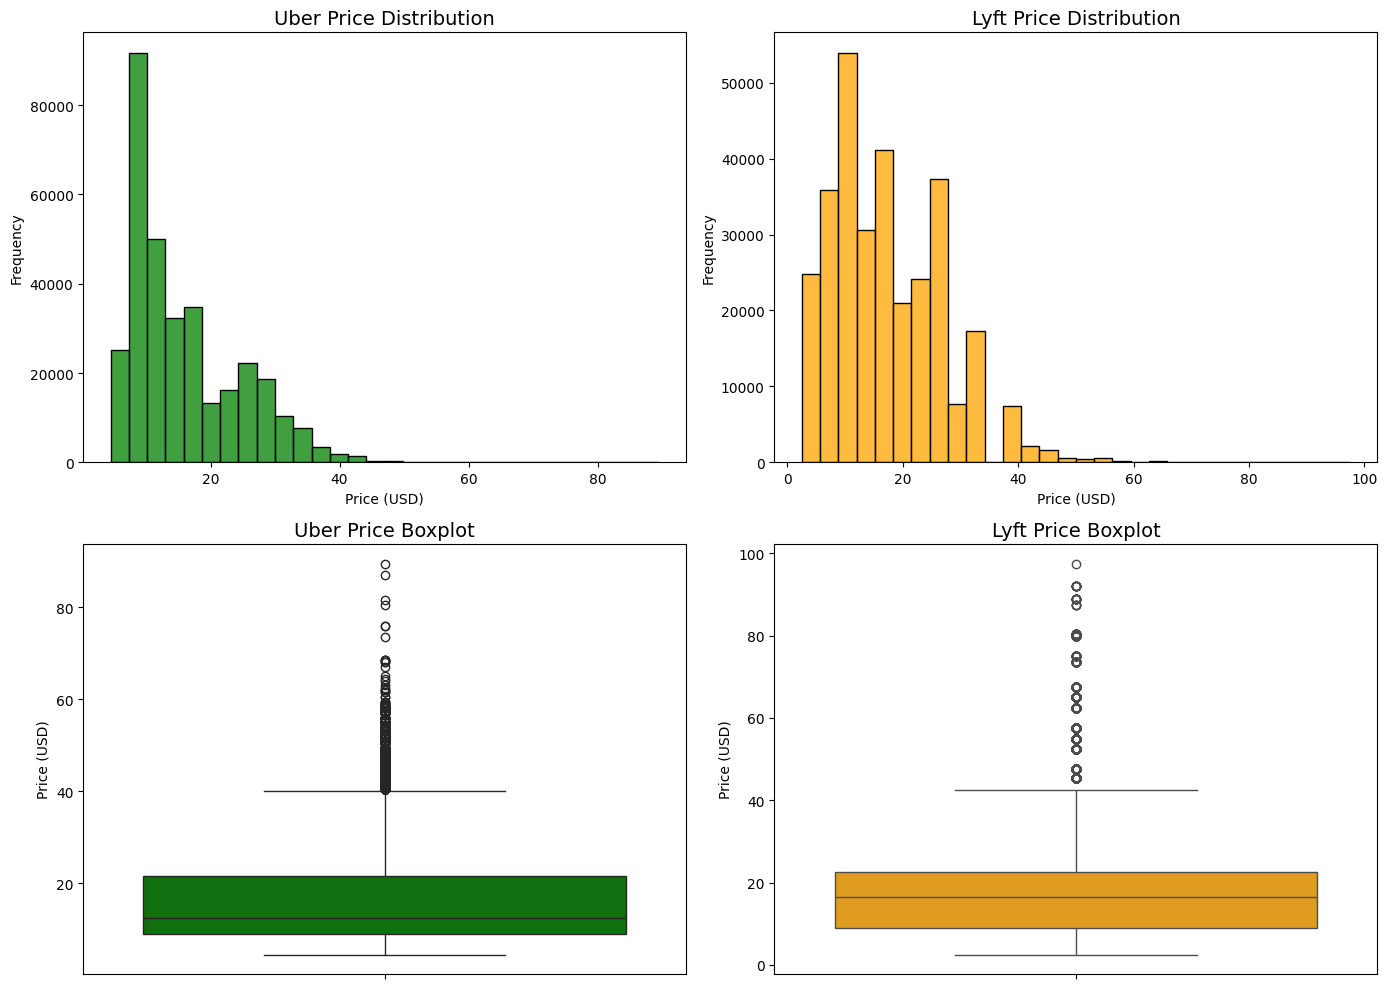

In [ ]:
# price distribution

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df_uber = df[df['cab_type'] == 'Uber']
df_lyft = df[df['cab_type'] == 'Lyft']

# uber histogram

sns.histplot(df_uber['price'], bins=30, color='green', ax=axes[0, 0])
axes[0, 0].set_title('Uber Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price (USD)')
axes[0, 0].set_ylabel('Frequency')

# lyft histogram

sns.histplot(df_lyft['price'], bins=30, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Lyft Price Distribution', fontsize=14)
axes[0, 1].set_xlabel('Price (USD)')
axes[0, 1].set_ylabel('Frequency')

# uber boxplot

sns.boxplot(y=df_uber['price'], color='green', ax=axes[1, 0])
axes[1, 0].set_title('Uber Price Boxplot', fontsize=14)
axes[1, 0].set_ylabel('Price (USD)')

# lyft boxplot

sns.boxplot(y=df_lyft['price'], color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Lyft Price Boxplot', fontsize=14)
axes[1, 1].set_ylabel('Price (USD)')

plt.tight_layout()
plt.show()


**INSIGHT**

---

From both the histogram and boxplot, it can be seen that both Uber and Lyft's price distribution is positively skewed (right-skewed). This means that most trips are lower in cost but there are few very expensive rides due to several factors.

The median price for both Uber and Lyft are closer to Q1 which means more trips are on the lower price end. There are frequent outliers on the boxplot.

## Average Price by Destination

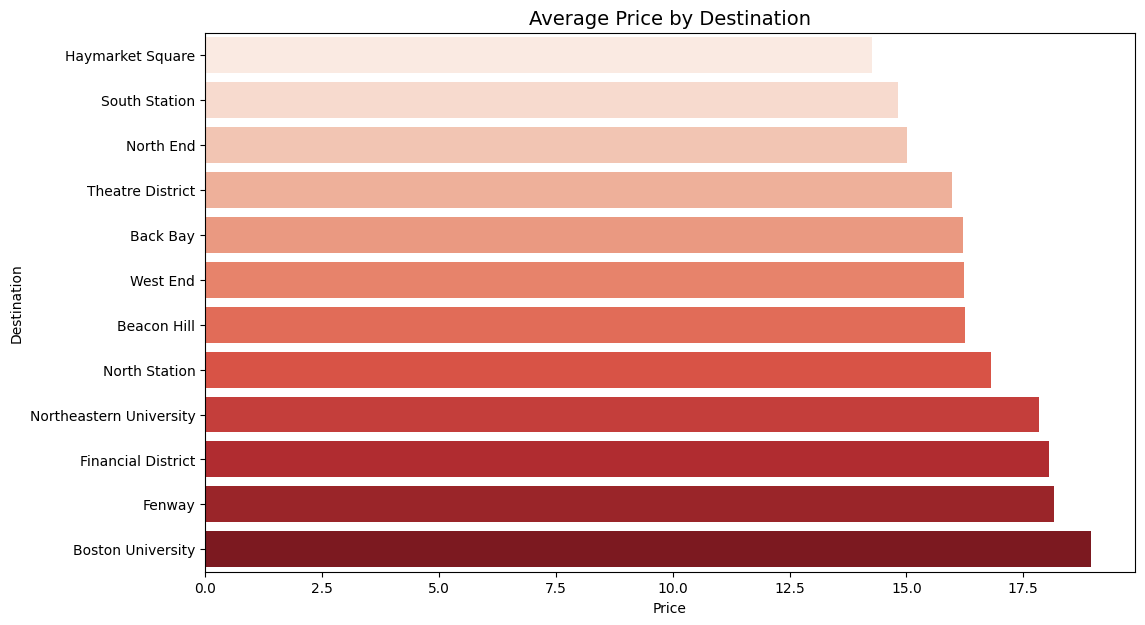

In [ ]:
# uber and lyft price comparison

destination_price = df.groupby(['destination'])['price'].mean().reset_index().sort_values(by='price', ascending=True)

# visualization

fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(data=destination_price, x='price', y='destination', palette='Reds', ax=ax)
ax.set_title('Average Price by Destination', fontsize=14)
ax.set_xlabel('Price')
ax.set_ylabel('Destination')
plt.show()

**INSIGHT**

---

Of all of the trips, the average cost of a trip to Boston University is the most expensive trip with a trip price of almost 20 USD. While the average cheapest trip is a trip to Haymarket Square with a price of less than 14.5 USD.

The average trip to Back Bay, West End, and Beacon Hill tends to be the same which is around 16.2 USD.

## Average Price by Hour

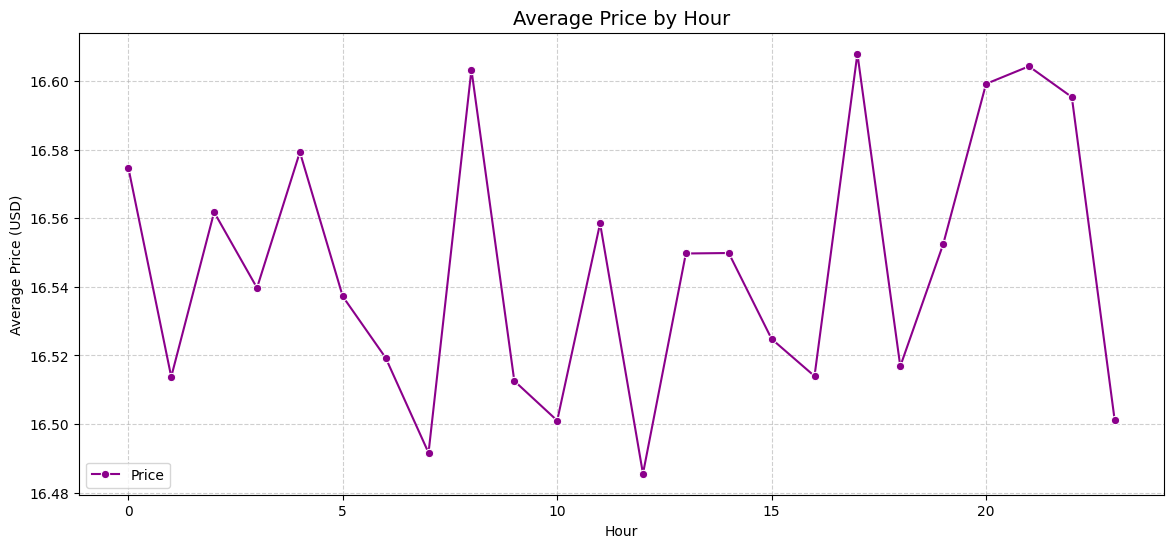

In [ ]:
# average price by hour

price_by_hour = df.groupby('hour')['price'].mean().reset_index()

# visualization

fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data=price_by_hour, x='hour', y='price', marker='o', color='darkmagenta', label='Price', ax=ax)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_title('Average Price by Hour', fontsize=14)
ax.set_xlabel('Hour')
ax.set_ylabel('Average Price (USD)')
ax.legend(loc='lower left')
plt.show()


**INSIGHT**

---

The average trip price for Uber and Lyft fluctuates every hour. The highest trip prices occur at 7-8 AM and 4-5 PM during rush hours with an average trip price of 16.6 USD.

A significant drop in trip prices occurs at midnight around 10-11 PM and trip prices tend to stabilize in the afternoon around 1-2 PM.

## Average Price by Cab Types

In [ ]:
price_by_hour

,hour,price
0,0,16.574769
1,1,16.513778
2,2,16.561803
3,3,16.539718
4,4,16.579311
5,5,16.537217
6,6,16.519326
7,7,16.491627
8,8,16.603326
9,9,16.512578


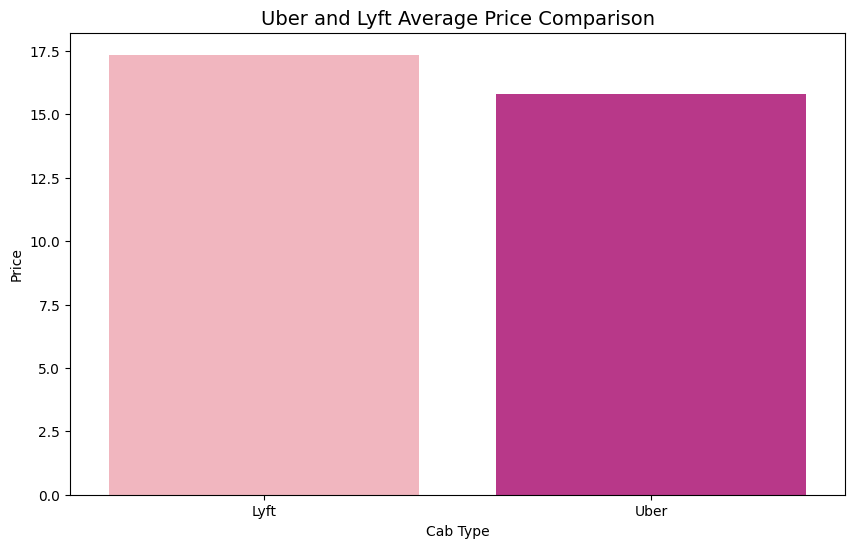

In [ ]:
# uber and lyft price comparison

price_cab = df.groupby(['cab_type'])['price'].mean().reset_index()

# visualization

fig, ax = plt.subplots(figsize=(10, 6))

# uber bar chart

sns.barplot(data=price_cab, x='cab_type', y='price', palette='RdPu', ax=ax)
ax.set_title('Uber and Lyft Average Price Comparison', fontsize=14)
ax.set_xlabel('Cab Type')
ax.set_ylabel('Price')
plt.show()



**INSIGHT**

---

The average price of a ride for Uber and Lyft has a slight difference. The average price of a ride for Lyft is about 2 USD more expensive than Uber.

## Average Price by Service Types

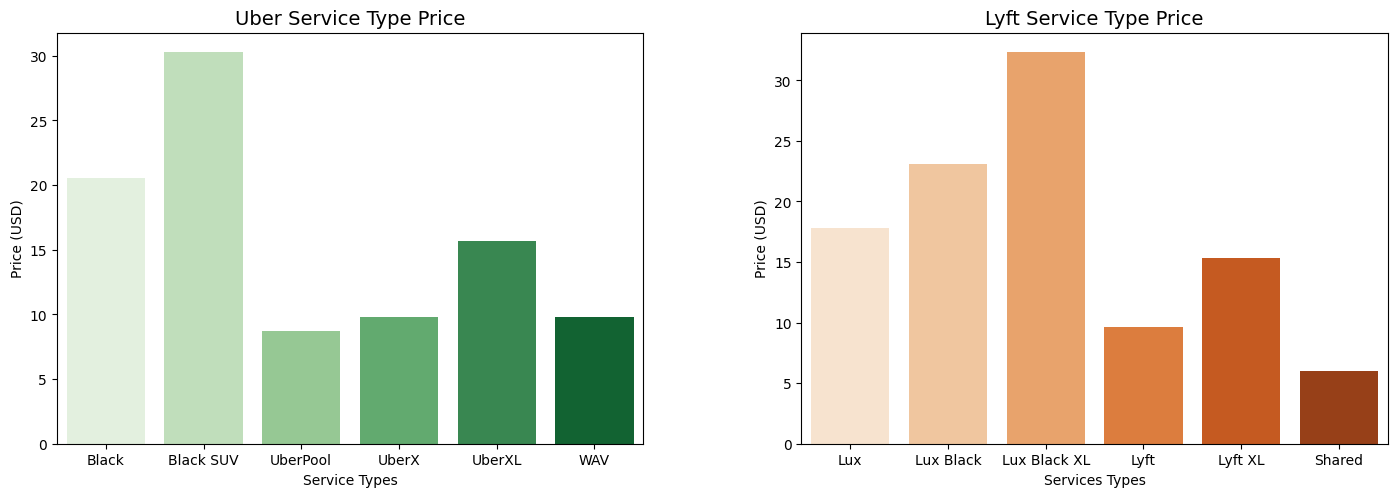

In [ ]:
# price comparison based on service types

price_comparison = df.groupby(['cab_type', 'name'])['price'].mean().reset_index()
uber_price = price_comparison[price_comparison['cab_type'] == 'Uber']
lyft_price = price_comparison[price_comparison ['cab_type'] == 'Lyft']

# visualization

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# uber bar chart

sns.barplot(data=uber_price, x='name', y='price', palette='Greens', ax=axes[0])
axes[0].set_title('Uber Service Type Price', fontsize=14)
axes[0].set_xlabel('Service Types')
axes[0].set_ylabel('Price (USD)')

# lyft bar chart

sns.barplot(data=lyft_price, x='name', y='price', palette='Oranges', ax=axes[1])
axes[1].set_title('Lyft Service Type Price', fontsize=14)
axes[1].set_xlabel('Services Types')
axes[1].set_ylabel('Price (USD)')

plt.tight_layout(pad=8)
plt.show()

**INSIGHT**

---

The average price of Uber and Lyft services is quite varied. The most expensive average price for Uber services is the Black SUV service with an average trip price of more than 30 USD. The cheapest average price is the Uberpool service with an average price of less than 9 USD.

While the average price for the most expensive Lyft is Lux Black XL services with an average price of 32 USD, the cheapest service from Lyft is the Shared service with an average price of 6 USD.

# Weather and Price Correlation

In [ ]:
# define weathers factor from the data

weather_features = df.copy()
weather_features.drop(['hour', 'day', 'month', 'datetime', 'source',
                        'destination', 'cab_type', 'name','distance',
                        'short_summary','icon','source_encoded','destination_encoded'], axis=1, inplace=True)
weather_features.head()

,price,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,temperatureMin,temperatureMax,icon_encoded,short_summary_encoded
0,5.0,1.0,42.34,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,34.19,32.70,1021.98,57,0.72,0,39.89,43.68,5,4
1,11.0,1.0,43.58,0.1299,1.0,0.94,11.98,11.98,4.786,47.30,42.10,41.83,1003.97,90,1.00,0,40.49,47.30,6,8
2,7.0,1.0,38.33,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,33.10,31.10,992.28,240,0.03,0,35.36,47.55,1,0
3,26.0,1.0,34.38,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,28.90,26.64,1013.73,310,0.00,0,34.67,45.03,1,0
4,9.0,1.0,37.44,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,36.71,28.61,998.36,303,0.44,0,33.10,42.18,5,6


In [ ]:
# correlation matrix for weather factors

correlation_matrix = weather_features.corr()
correlation_matrix

,price,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,temperatureMin,temperatureMax,icon_encoded,short_summary_encoded
price,1.000000,0.240458,-0.000084,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.001497,-0.000516,0.000182,-0.000615,0.000866,-0.001382,0.000883,-0.000424,-0.000428,-0.000550,0.002100,0.001245
surge_multiplier,0.240458,1.000000,-0.001594,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.001716,-0.001943,-0.002669,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,-0.000716,-0.001998,0.000358,-0.002304
temperature,-0.000084,-0.001594,1.000000,0.182673,0.239189,0.313813,0.058846,-0.008775,-0.324158,0.788564,0.502193,0.863992,-0.339378,-0.244166,0.355049,0.158551,0.789220,0.780426,0.144674,0.243807
precipIntensity,0.000166,-0.001522,0.182673,1.000000,0.838417,0.417526,0.307171,0.197778,-0.600613,0.119134,0.231904,0.338694,-0.143495,-0.433185,0.288915,-0.099148,0.236618,0.114034,0.456606,0.189258
precipProbability,-0.000243,-0.002825,0.239189,0.838417,1.000000,0.548855,0.251854,0.127322,-0.761438,0.147951,0.246409,0.445318,-0.179355,-0.469847,0.387142,-0.071207,0.274351,0.142088,0.557514,0.074016
humidity,-0.001238,-0.001677,0.313813,0.417526,0.548855,1.000000,-0.207121,-0.306424,-0.697860,0.429811,0.471614,0.747305,-0.134010,-0.356532,0.480196,-0.208096,0.461536,0.394681,0.207301,0.091112
windSpeed,0.000990,0.002593,0.058846,0.307171,0.251854,-0.207121,1.000000,0.937649,-0.035550,-0.188793,-0.286540,-0.074816,-0.574573,0.113264,0.159671,0.067389,0.174181,-0.120540,0.241985,0.181194
windGust,0.001218,0.002162,-0.008775,0.197778,0.127322,-0.306424,0.937649,1.000000,0.038898,-0.230810,-0.341706,-0.175292,-0.513851,0.168536,0.104673,0.089758,0.081460,-0.144428,0.166775,0.158580
visibility,0.001497,0.001716,-0.324158,-0.600613,-0.761438,-0.697860,-0.035550,0.038898,1.000000,-0.290560,-0.263606,-0.579974,0.227875,0.401478,-0.477676,0.119983,-0.352681,-0.297030,-0.348840,-0.059609
temperatureHigh,-0.000516,-0.001943,0.788564,0.119134,0.147951,0.429811,-0.188793,-0.230810,-0.290560,1.000000,0.611616,0.777749,-0.144937,-0.191957,0.112349,-0.012338,0.794579,0.985996,0.102684,0.097624


In [ ]:
# drop columns that have corr < 0.005

cols_to_drop = correlation_matrix.abs()['price'][abs(correlation_matrix['price']) < 0.00500].index.tolist()

df_filtered = df_onehot.drop(columns=cols_to_drop)
df_filtered.head()

,hour,day,month,datetime,source,destination,price,distance,surge_multiplier,short_summary,...,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,5.0,0.44,1.0,Mostly Cloudy,...,0,0,0,1,0,0,0,0,1,0
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,11.0,0.44,1.0,Rain,...,0,0,0,0,0,0,0,0,1,0
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,7.0,0.44,1.0,Clear,...,0,1,0,0,0,0,0,0,1,0
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,26.0,0.44,1.0,Clear,...,1,0,0,0,0,0,0,0,1,0
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,9.0,0.44,1.0,Partly Cloudy,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   hour                 637976 non-null  int32         
 1   day                  637976 non-null  int64         
 2   month                637976 non-null  int64         
 3   datetime             637976 non-null  datetime64[ns]
 4   source               637976 non-null  object        
 5   destination          637976 non-null  object        
 6   price                637976 non-null  float64       
 7   distance             637976 non-null  float64       
 8   surge_multiplier     637976 non-null  float64       
 9   short_summary        637976 non-null  object        
 10  icon                 637976 non-null  object        
 11  source_encoded       637976 non-null  int64         
 12  destination_encoded  637976 non-null  int64         
 13  name_Black         

**INSIGHT**

---

It can be seen from the correlation matrix that the weather factors and price show a low correlation with values close to 0.

# Price Prediction Model

In [ ]:
# assign new df for modelling

df_predict = df_filtered.copy()
df_predict.drop(['day','month','datetime','icon','short_summary','destination','source'], axis=1, inplace=True)
df_predict.head()

,hour,price,distance,surge_multiplier,source_encoded,destination_encoded,icon_encoded,name_Black,name_Black SUV,name_Lux,...,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
0,9,5.0,0.44,1.0,5,7,5,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,11.0,0.44,1.0,5,7,6,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,7.0,0.44,1.0,5,7,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,26.0,0.44,1.0,5,7,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,3,9.0,0.44,1.0,5,7,5,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# split data

X = df_predict.drop(columns=['price'])
y = df_predict['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# build model

reg = LinearRegression()

In [ ]:
# fit data to model

model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
# model evaluation

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error (MAE): 1.78
Mean Squared Error (MSE): 6.32
R-squared: 0.93


**INSIGHT**

- MAE of 1.78 indicates that, on average, the model's prediction is off by 1.78 units from the actual values.
- MSE of 6.32 shows the average of the squared errors, this model has an average squared error of 6.32.
- R2 of 0.93 means that the model explains 93% of the variance in the target variable, with the rest of 7% of the variation being unexplained or due to other factors.

# Conclusion

From the data, we can conclude that Uber has a higher user base than Lyft, with a notable difference of 23 thousand users. Both Uber and Lyft have 6 service types and show an equal distribution across their service types.

The top pickup and destination location for Uber and Lyft is the Financial District which is the business heart of NYC. It's home to hundreds of offices and the headquarters of many major financial institutions. The remaining top locations differ, highlighting distinct user preferences for each service.

Trip patterns for both Uber and Lyft show similar trends. Uber consistently has slightly more trips than Lyft throughout the day. The highest number of trips occurs around midnight (11 PM to 0 AM) possibly due to the night activities, and the lowest number of trips occurs around early morning (6-7 AM) possibly because of fewer commuters. Both services experience a surge in trips during rush hours around 8 AM, with stable volumes of rides in the afternoon.

The price distribution for both services is right-skewed, indicating more affordable rides but at some point, there are few expensive rides due to rush hours, distance, and other factors.
Boston University stands out as the most expensive destination while Haymarket Square is the cheapest. The price of Uber and Lyft services varies with Lyft being slightly more expensive on average. Moreover, the correlation between weather and pricing is weak, indicating other factors drive pricing more significantly.

In terms of model performance, the prediction model has a R2 value of 93%, indicating that it is relatively accurate for predictions. This is also supported by relatively low MAE and MSE, which indicate that the model's predictions are generally close to the actual values.